In [2]:
from pathlib import Path
import numpy as np
from PIL import Image
import glob
from facenet_models import FacenetModel
from vision_profile import FaceDatabase
from camera import take_picture
from estimation import detect_face_prob, extract_descriptors, plot_histograms, is_true_positive
from cosdistance import cosine_distance
from descriptor import descriptorMatch, displayFinalPicture

#import matplotlib.pyplot as plt
%matplotlib inline


model = FacenetModel()

In [5]:
labels = []

db = FaceDatabase(file_path="database.pkl")
for filename in glob.glob(r'.\pics\train\*.jpg'):
    pic = Image.open(filename)
    pic_arr = np.array(pic)
    boxes, probabilities, landmarks = model.detect(pic_arr)
    name = filename[13:-6]
    print(name)
    labels.append(name)
    descriptors = model.compute_descriptors(pic_arr, boxes) #gets descriptor for every file
    db.add_image(name, descriptors)
    print('added')
db.save()
print('saved')
 
#pic = Image.open(r'pics/test/Will_Smith_test.jpg')  
#pic_arr = np.array(pic)

Angelina_Jolie
added
Angelina_Jolie
added
Angelina_Jolie
added
Margot_Robbie
added
Margot_Robbie
added
Margot_Robbie
added
Scarlett_Johansson
added
Scarlett_Johansson
added
Scarlett_Johansson
added
Tilda_Swinton
added
Tilda_Swinton
added
Tilda_Swinton
added
Timothee_Chalamet
added
Timothee_Chalamet
added
Timothee_Chalamet
added
Tom_Cruise
added
Tom_Cruise
added
Tom_Cruise
added
Tom_Holland
added
Tom_Holland
added
Tom_Holland
added
Will_Smith
added
Will_Smith
added
Will_Smith
added
Zendaya
added
Zendaya
added
Zendaya
added
saved


In [4]:
"""db.load('database.pkl')
print(list(db.data.keys())[0])
print(list(db.data.values())[0].descriptors)
len(list(db.data.keys()))"""

Angelina_Jolie
[array([[ 2.53094966e-03, -3.71902548e-02, -5.77739626e-02,
        -5.72847165e-02,  1.15000643e-01,  2.31447187e-03,
         9.68842730e-02,  4.83587431e-03, -2.85893809e-02,
        -2.12112106e-02,  1.91344488e-02,  3.69862467e-02,
        -2.27456409e-02, -9.99435857e-02,  7.15302583e-03,
         4.96518053e-03, -1.53758051e-02, -1.55380908e-02,
        -3.61230485e-02,  1.66289806e-02,  6.45905500e-03,
         1.23631600e-02, -4.45692092e-02, -6.02729572e-03,
        -2.56528053e-02,  4.67029326e-02,  4.33788188e-02,
        -8.11299309e-02, -1.17641389e-02, -5.82625717e-02,
         1.76234264e-02, -5.78815006e-02, -8.15116987e-03,
         1.26365805e-02, -2.64637079e-02,  3.72733213e-02,
         6.33092597e-02, -3.93714644e-02,  3.96384075e-02,
         4.78462875e-03,  5.87017387e-02, -9.00705606e-02,
        -1.46719338e-02, -4.22995798e-02, -1.89808030e-02,
         2.22622640e-02, -1.23808896e-02,  3.28752473e-02,
         2.09745485e-02, -1.55706722e-02

9

In [9]:
pic = Image.open(r'./pics/test/Rick.jpg')  
pic_arr = np.array(pic)
boxes, probabilities, landmarks = model.detect(pic_arr)
descriptors = model.compute_descriptors(pic_arr, boxes)
#database = FaceDatabase()
db = FaceDatabase(file_path="database.pkl")
db.load('database.pkl')
print(f"Number of faces detected: {len(boxes)}")
verdict = descriptorMatch(db, descriptors, threshold=0.5)
print(verdict)
#np.save('arr', pic_arr)
#displayFinalPicture(pic_arr, verdict)
#plt.show()

Number of faces detected: 1
No match found


Angelina_Jolie
Angelina_Jolie
Angelina_Jolie
Scarlett_Johansson
Scarlett_Johansson
Scarlett_Johansson
Tom_Cruise
Tom_Cruise
Tom_Cruise
Will_Smith
Will_Smith
Will_Smith


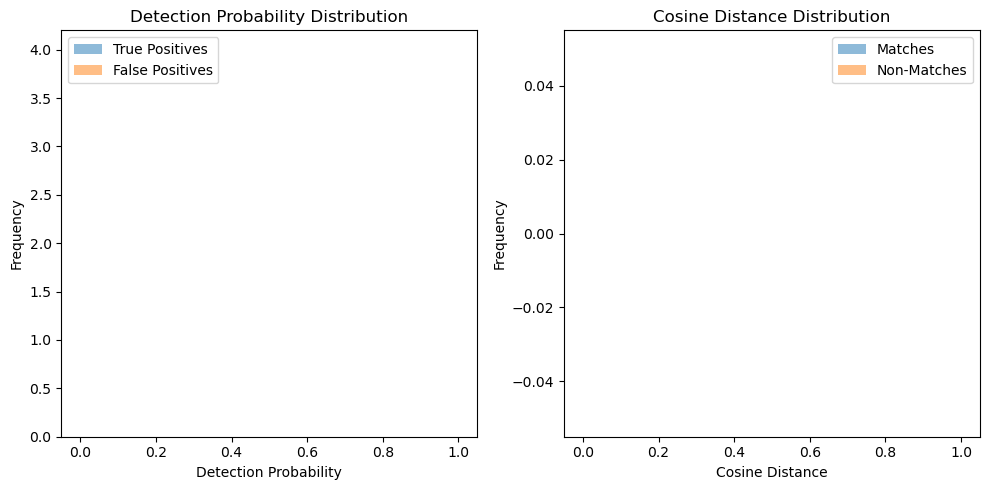

In [7]:
%matplotlib inline
match_distances = []
non_match_distances = []
true_positives = []
false_positives = []


for filename in glob.glob(r'./pics/train/*.jpg'):

    pic = Image.open(filename)
    pic_arr = np.array(pic)
    boxes, probs, landmarks = model.detect(pic_arr)
    descriptors = model.compute_descriptors(pic_arr, boxes)
    

    for prob in probs:
        if is_true_positive(prob, threshold=0.5): # 0.5 is placeholder [0,1]
            true_positives.append(prob)
        else:
            false_positives.append(prob)

    # for i, descriptor1 in enumerate(descriptors):
    #     for j, descriptor2 in enumerate(descriptors):
    #         if i < j:
    #             distance = cosine_distance(descriptor1, descriptor2, labels)[0][0]
    #             if labels[i] == labels[j]:
    #                 match_distances.append(distance)
    #             else:
    #                 non_match_distances.append(distance)
    matches, non_matches = cosine_distance(descriptor1, descriptor2, labels)


plot_histograms(true_positives, false_positives, match_distances, non_match_distances)

    # print(descriptors)

    # detections = [detect_face_prob(img, model) for img in pic_arr]
    # descriptors = [extract_descriptors(img, boxes, model) for img, (boxes, _, _) in zip(pic_arr, detections)]
    # descriptors = np.concatenate(descriptors, axis=0)
    # labels = np.concatenate([[label] * len(boxes) for label, (boxes, _, _) in zip(pic_arr, detections)], axis=0)

    # match_distances, non_match_distances = cosine_distance(descriptors, labels, model)
    # true_positives = [prob for _, probs in detections for prob in probs if is_true_positive(prob, labels)]
    # false_negatives = [prob for _, probs in detections for prob in probs if not is_true_positive(prob, labels)]